Accuracy: 0.84
                  precision    recall  f1-score   support

down_by_elevator       0.68      0.69      0.68      2019
      going_down       0.76      0.75      0.76      2057
        going_up       0.84      0.84      0.84      2040
         running       0.92      0.90      0.91      2605
         sitting       0.97      0.98      0.98      2004
    sitting_down       0.90      0.91      0.91      1055
        standing       0.96      0.96      0.96      1990
     standing_up       0.90      0.92      0.91      1142
  up_by_elevator       0.69      0.69      0.69      2108
         walking       0.78      0.80      0.79      2000

        accuracy                           0.84     19020
       macro avg       0.84      0.84      0.84     19020
    weighted avg       0.84      0.84      0.84     19020



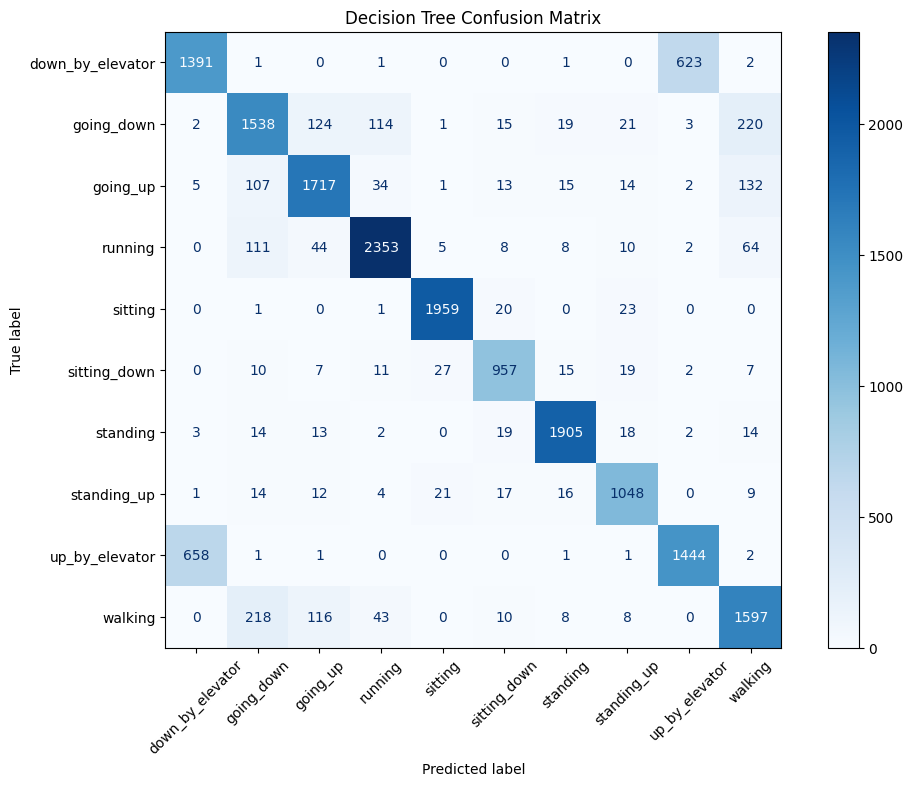

[Text(0.6532185318160771, 0.9880952380952381, 'x[20] <= 0.92\ngini = 0.895\nsamples = 76080\nvalue = [8246.0, 8077.0, 8159.0, 10415.0, 8262.0, 4198.0, 8029.0\n4553.0, 8097.0, 8044.0]'),
 Text(0.34121338310588867, 0.9642857142857143, 'x[23] <= -0.51\ngini = 0.88\nsamples = 63667\nvalue = [8246.0, 7902.0, 7837.0, 9109.0, 324.0, 2747.0, 8029.0\n3603.0, 8097.0, 7773.0]'),
 Text(0.11555495809068145, 0.9404761904761905, 'x[7] <= 0.458\ngini = 0.703\nsamples = 19440\nvalue = [6964.0, 969.0, 700.0, 1297.0, 0.0, 13.0, 629.0, 45.0\n7678.0, 1145.0]'),
 Text(0.05747334965961267, 0.9166666666666666, 'x[16] <= 0.65\ngini = 0.781\nsamples = 5941\nvalue = [2061, 768, 536, 1271, 0, 5, 282, 28, 29, 961]'),
 Text(0.041874231981096126, 0.8928571428571429, 'x[14] <= 0.372\ngini = 0.77\nsamples = 3839\nvalue = [29, 711, 534, 1268, 0, 4, 282, 28, 29, 954]'),
 Text(0.024363252388372246, 0.8690476190476191, 'x[7] <= 0.28\ngini = 0.726\nsamples = 2772\nvalue = [29.0, 474.0, 231.0, 1218.0, 0.0, 2.0, 254.0, 10.0\

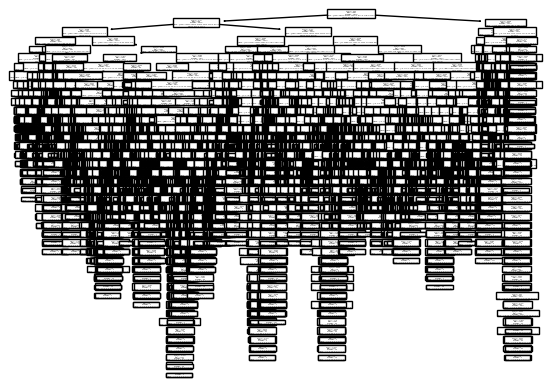

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./csv/database_balanced_cf.csv')

# seperando os atributos do alvo
X = df.drop(columns=['activity'])
y = df['activity']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# árvore de decisão classificadora
dt = tree.DecisionTreeClassifier()

# treino
dt.fit(X_train, y_train)

# previsão
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=45)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# gráfico da árvore de decisão
tree.plot_tree(dt) 